In [22]:
#chunk 1

import pandas as pd
df = pd.read_csv('./credit_score_data.csv')
df.iloc[0]

client_id                       67388007
age                                   33
sex                               hombre
zone                                   2
education                    universidad
civil_status                     soltero
children                               3
work_disability                       no
monthly_txs                           17
main_os                          android
devices                                1
daily_balance_checks                   5
account_quantity                       3
cc_quantity                            2
cc_limit_usage_avg                  0.17
monthly_income                     35929
monthly_outcome                    16748
cc_limit                           24619
cc_debt                             8414
savings_amount                    117713
checking_balance                   32621
late_payments_last_year                0
fixed_investment_amount            90676
cash_installment_debt               5155
visa_installment

In [23]:
#chunk 2

df['sex'] = df['sex'].map({'hombre': 0, 'mujer': 1})
df['education'] = df['education'].map({'colegio': 0, 'universidad': 1, 'postgrado': 2})
df['civil_status'] = df['civil_status'].map({'soltero': 0, 'casado': 1, 'divorciado': 2})
df['work_disability'] = df['work_disability'].map({'no': 0, 'yes': 1})
df['main_os'] = df['main_os'].map({'android': 0, 'ios': 1})


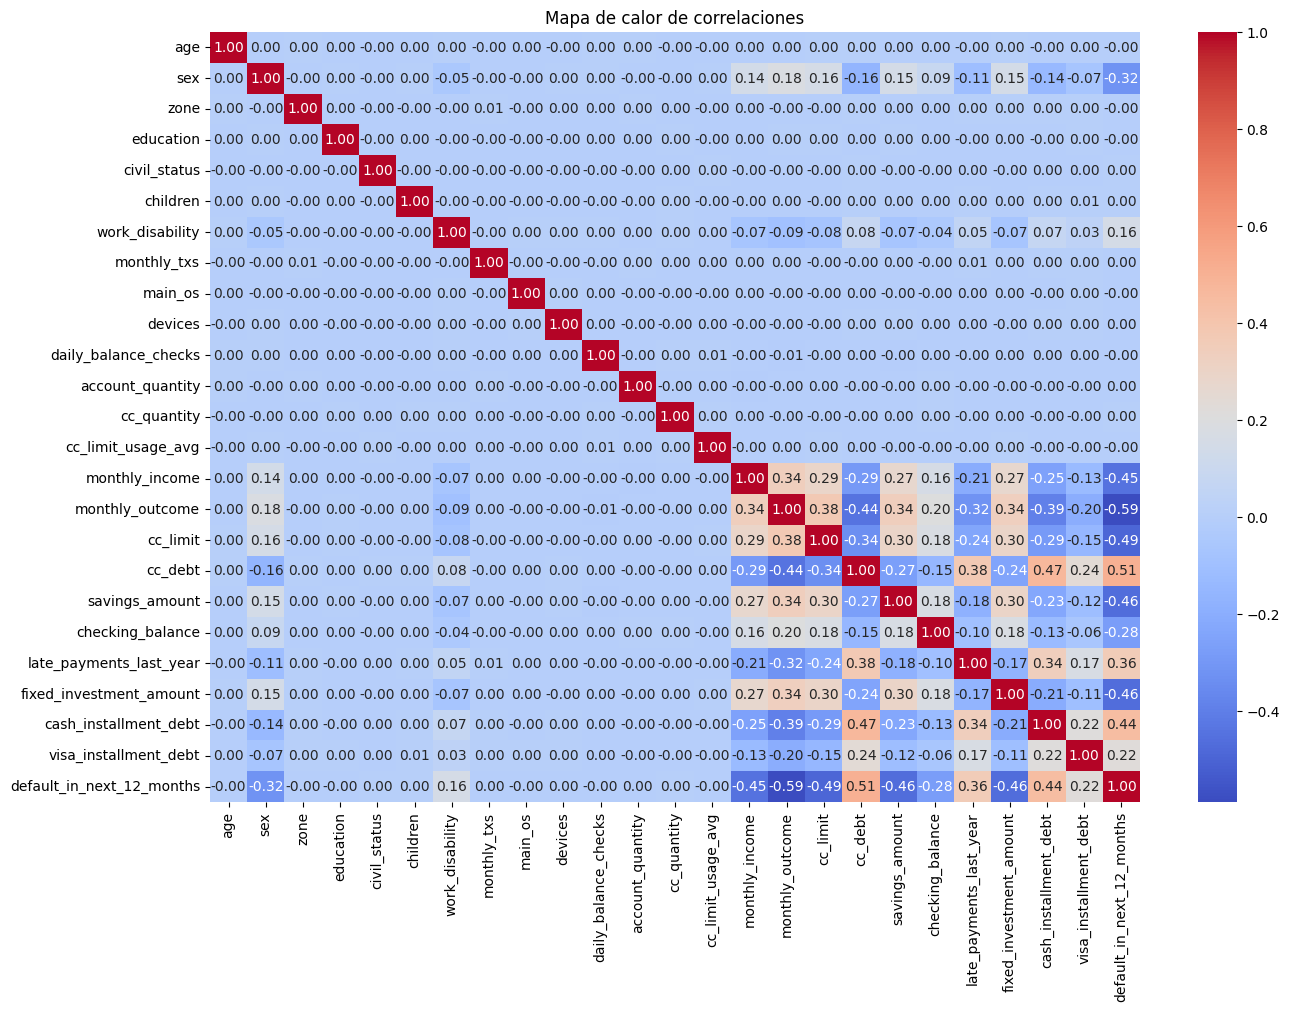

In [24]:
#chunk 3

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['client_id']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()


In [25]:
#chunk 4

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['client_id', 'default_in_next_12_months'])
y = df['default_in_next_12_months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print("Modelo Entrenado")


Modelo Entrenado


c:\Users\luisp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#chunk 5

from sklearn.metrics import roc_curve

# Obtener probabilidades
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular KS
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
ks_statistic = max(tpr - fpr)

print(f'Estadístico KS: {ks_statistic:.6f}')

from sklearn.metrics import roc_auc_score

# Asegurar que tienes las probabilidades listas
y_scores_onehot = model.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_score = roc_auc_score(y_test, y_scores_onehot)
print(f"AUC: {auc_score:.6f}")

Estadístico KS: 0.780236
AUC: 0.957167


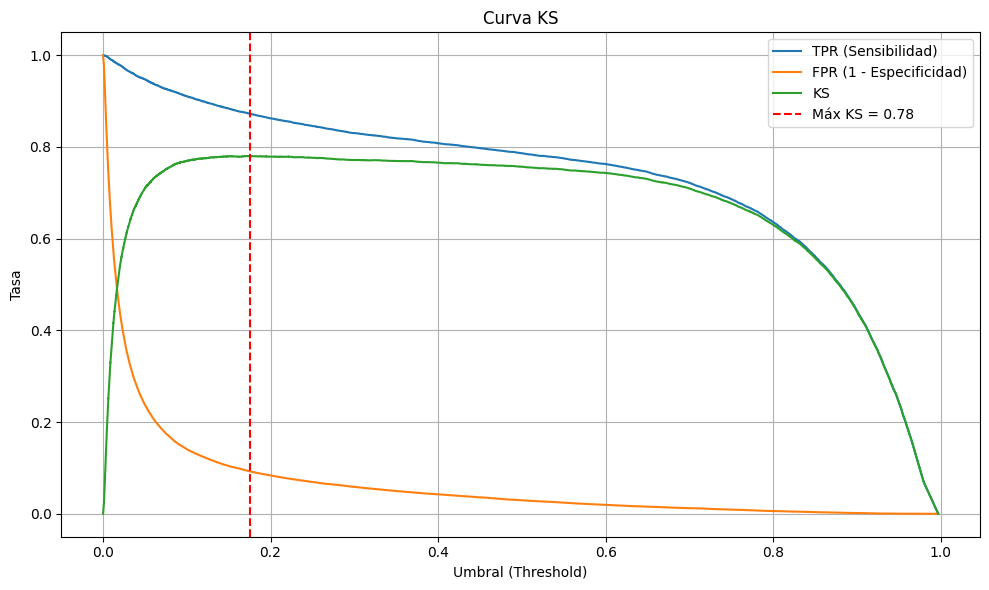

In [27]:
#chunk 6

import matplotlib.pyplot as plt
import numpy as np

# Calcular diferencia TPR - FPR
ks_values = tpr - fpr
ks_max_idx = np.argmax(ks_values)

# Graficar curva KS
plt.figure(figsize=(10,6))
plt.plot(thresholds, tpr, label='TPR (Sensibilidad)')
plt.plot(thresholds, fpr, label='FPR (1 - Especificidad)')
plt.plot(thresholds, ks_values, label='KS')
plt.axvline(thresholds[ks_max_idx], color='red', linestyle='--', label=f'Máx KS = {ks_values[ks_max_idx]:.2f}')
plt.xlabel('Umbral (Threshold)')
plt.ylabel('Tasa')
plt.title('Curva KS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# chunk 7

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print(coef_df)


                   Variable  Coeficiente
20  late_payments_last_year     0.166051
10     daily_balance_checks     0.094948
5                  children     0.061783
9                   devices     0.056050
11         account_quantity     0.053460
6           work_disability     0.047652
12              cc_quantity     0.044506
2                      zone     0.030673
3                 education     0.023493
4              civil_status     0.022499
13       cc_limit_usage_avg     0.014711
8                   main_os     0.008553
0                       age     0.005904
22    cash_installment_debt     0.000061
23    visa_installment_debt     0.000031
17                  cc_debt     0.000028
21  fixed_investment_amount    -0.000007
18           savings_amount    -0.000008
19         checking_balance    -0.000019
16                 cc_limit    -0.000025
14           monthly_income    -0.000033
15          monthly_outcome    -0.000071
7               monthly_txs    -0.009993
1               

### **¿Cómo se interpreta la tabla de arriba?**

Si el coeficiente es positivo, entonces a mayor valor de esa variable, más probabilidad hay de caer en impago.

Si es negativo, entonces esa variable disminuye la probabilidad de impago.

Cuanto más lejos de 0 esté el valor, más importante es la variable.

&nbsp;
&nbsp;

### **¿Qué significa el estadístico KS y por qué es importante?**

El estadístico KS (Kolmogorov-Smirnov) mide la capacidad de un modelo para diferenciar entre dos grupos, en este caso:

Clientes que van a caer en impago (default = 1).

Clientes que no caerán en impago (default = 0).

El KS se basa en la curva ROC y calcula la diferencia máxima entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a través de todos los posibles umbrales de clasificación.

&nbsp;
&nbsp;

### **Interpretación del resultado**


0.20 o menos    Modelo pobre o sin poder predictivo

0.20 – 0.40	    Modelo aceptable pero débil

0.40 – 0.60	    Buen modelo

0.60 – 0.75	    Muy buen modelo

0.75 o más      Modelo excelente

El resultado obtenido fue de 0.7755 lo que significa que hay una gran diferencia entre la distribución de probabilidades que el modelo asigna a los que sí caerán en impago versus los que no. En otras palabras:

Por ende se puede decir que el modelo separa muy bien a los buenos pagadores de los malos pagadores. Si se llega a utilizar este modelo para decidir a quién otorgarle un crédito, se podría estar tomando decisiones mucho más informadas y efectivas lo cual es algo bastante positivo para el caso.